### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Independent variable** - the two conditions - congruent words, and incongruent words.<br>
**Dependent variable** - reaction time in each of the two conditions.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Hypotheses:**

Null hypotheses, $H_0$ - the reaction time of the congruent words condition is greater than or equal to the incongruent words condition: $\mu_{congruent} \ge \mu_{incongruent}$

Alternate hypotheses, $H_A$ - the reaction time of the congruent words condition is less than the incongruent words condition: $\mu_{congruent} < \mu_{incongruent}$

Where: $\mu_{congruent}$ - Mean of congruent reaction times in seconds, $\mu_{incongruent}$ - Mean of incongruent reaction times in seconds <\br>


To determine if list congruity has any effect on reaction time the Recommended statistical test are dependent samples t-test, one-tailed and negative. it suffices to test hypothesis #2. It is a broader statement that makes no assumptions as to which mean is greater. Since we do not have information on population parameters, a **dependent samples t-test** will be appropriate to test the alternative hypothesis against the null. By examining how the sample means differ from each other, we will be able to make a determination about how the population means differ. The samples are *dependent* because each participant is timed twice: once with the congruent list and once with the incongruent list.

After doing the test myself on the [interactive Stroof Effect website](https://faculty.washington.edu/chudler/java/ready.html), it took me congruent = 13.287 secs, incongruent = 27.269 secs. I expect to reject the null hypothesis and come to the conclusion that it takes significantly longer to identify colors where the text does not match the ink. But I am a sample size of one, so we will need to examine a larger sample to establish this. 
  
[^stroop]: https://en.wikipedia.org/wiki/Stroop_effect "Stroop Effect"
[^stroop paper]: http://psychclassics.yorku.ca/Stroop/

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [32]:
# Perform the analysis here
import pandas as pd

stroop_data = pd.read_csv("stroopdata.csv")
stroop_data.head(21)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [20]:
stroop_data.shape

(24, 2)

In [25]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


From above:

* Mean - 
   * Congruent = 14.05 secs
   * Incongruent = 22.02 secs
* Standard deviation - 
   * Congruent = 3.56 secs
   * Incongruent = 4.80 secs
* Median - 
   * Congruent = 14.36 secs
   * Incongruent = 21.02 secs

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

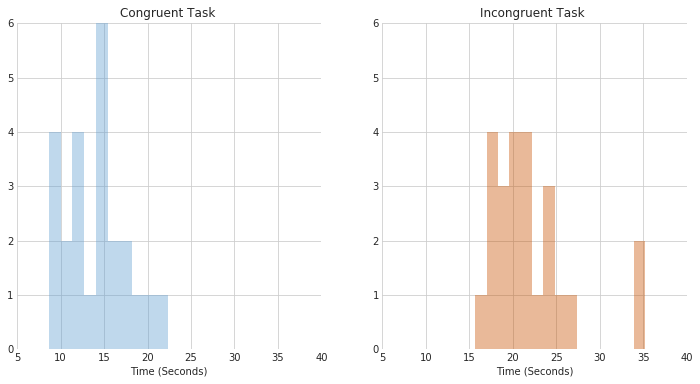

In [26]:
# Build the visualizations here
import matplotlib.pyplot as plt
import seaborn as sns
#Histogram
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim(5,40)
ax1.set_ylim(0,4)
sns.distplot(stroop_data["Congruent"], bins=10, kde=False, color=(95/255,158/255,209/255))
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim(5,40)
ax2.set_ylim(0,4)
sns.distplot(stroop_data["Incongruent"], bins=15, kde=False, color=(200/255, 82/255, 0/255))
sns.despine(left=True, bottom=True)
ax1.set_title("Congruent Task ")
ax1.set_xlabel("Time (Seconds)")
ax1.set_yticks([0,1,2,3,4,5,6])
ax2.set_title("Incongruent Task ")
ax2.set_xlabel("Time (Seconds)")
ax2.set_yticks([0,1,2,3,4,5,6])
plt.show()

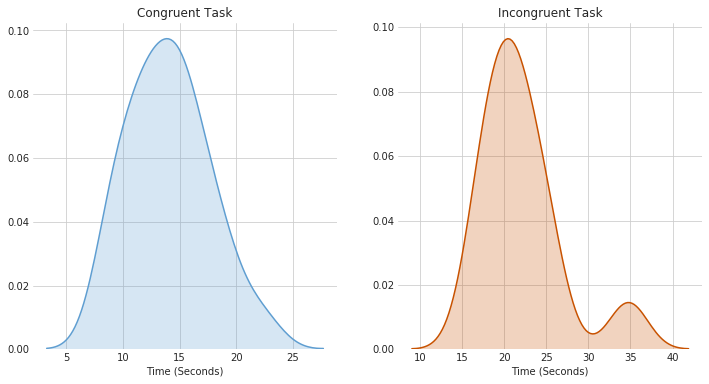

In [27]:
#Different type of plot - Kernel density plot
sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
sns.kdeplot(stroop_data["Congruent"], shade=True, legend=False, color=(95/255,158/255,209/255))
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(stroop_data["Incongruent"], shade=True, legend=False, color=(200/255, 82/255, 0/255))
sns.despine(left=True, bottom=True)
ax1.set_title("Congruent Task")
ax1.set_xlabel("Time (Seconds)")
ax2.set_title("Incongruent Task")
ax2.set_xlabel("Time (Seconds)")
plt.show()

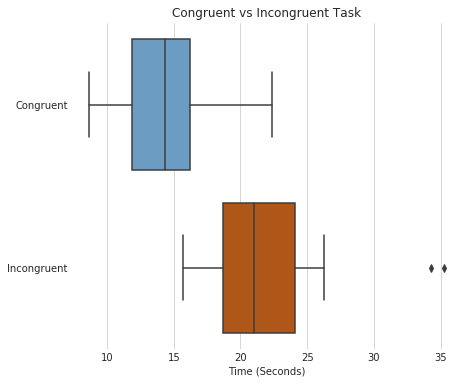

In [28]:
# another plot  - Box plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7,6))
sns.boxplot(data=stroop_data, orient="h", palette=[(95/255,158/255,209/255),(200/255, 82/255, 0/255)])
sns.despine(left=True, bottom=True)
ax.set_title("Congruent vs Incongruent Task")
ax.set_xlabel("Time (Seconds)")
plt.show()

**Observations:**

1. Distribution of congruent and incongruent times are dense around the median and less spread out.
2. It is easily noticeable that the incongruent times are considerably higher than congruent times.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [29]:
stroop_data["Congruent - Incongruent"] = stroop_data["Congruent"] - stroop_data["Incongruent"]
stroop_data["Congruent - Incongruent"].std()

4.8648269103590556

$s_{c-i} = 4.86$ secs

In [30]:
# Perform the statistical test here
import math
from scipy import stats

mean_diff = stroop_data["Congruent"].mean()-stroop_data["Incongruent"].mean()
std_err = stroop_data["Congruent - Incongruent"].std()/math.sqrt(stroop_data["Congruent"].count())
print(mean_diff, std_err, stats.ttest_rel(stroop_data["Congruent"], stroop_data["Incongruent"]))

-7.96479166667 0.993028634778 Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


$\bar x_c - \bar x_i = -7.96$ secs

S.E. = 0.99 secs

$t_{stat} = -8.021$

P-value = 0.00000004

t(23) = -8.021, p=.00, one-tailed

$\alpha = 0.01$ i.e. confidence level = 99%

$t_{critical} = -2.500$

**Decision: Reject $H_0$ i.e. Reject - "the reaction time of the congruent words condition is greater than or equal to the incongruent words condition"**

**This means, that the reaction time of the congruent words condition is significantly less than the incongruent words condition.**

**Conclusion**<br>
We see that the average time of sample under congruent conditions is different from the average time of sample under incongruent conditions. My confidence level is .001(0.1%), and since the degree of freedom is n - 1 which is 23, my critical statistic value is ± 3.768. Also, I reject the null hypothesis. Finally, as I expected when I saw the boxplot, the results from t-test match up with my expectations.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think the reason of the Stroop effect is because in the incongruent word condition the words distract the attention. According to Wikepedia, the Simon effect is similar to the Stroop effect. The Simon effect refers to the finding that reactions are faster and accurate when stimulus occurs in the same relative location.